**Srinivas Naidu Pasyavula <br>
QC61851**
<br><br>
Dr. Tony Diana <br>
DATA 690 Introduction to NLP <br>
Homework, Week 4

**DATA Source -** https://archive.ics.uci.edu/dataset/331/sentiment+labelled+sentences

## Mounting the Dataset in the Drive

In [1]:
# This code mounts your Google Drive to the Colab notebook, changes the directory to a specific folder on your Drive, and lists the contents of that folder using the ls command.

#!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
%cd /content/drive/MyDrive/'Colab Notebooks'/'NLP DATA 690 UMBC'/'week4'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/NLP DATA 690 UMBC/week4
 amazon_cells_labelled.txt	 'QC61851- Week 4-NLP.ipynb'
'NLP WEEK 4 HW Exercise2.ipynb'


## 1. Import the required libraries.

In [2]:
# Importing all the Libraries and Packages

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset, Dataset
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation
from torch.nn.utils.rnn import pad_sequence
from sklearn.model_selection import train_test_split  # For data splitting
import matplotlib.pyplot as plt

## 2. Load the dataset

In [3]:
import pandas as pd
import string

# Load the dataset (assuming you have already done this)
file_path = 'amazon_cells_labelled.txt'
column_names = ['review', 'label']
df = pd.read_csv(file_path, sep='\t', header=None, names=column_names)

In [4]:
print(df.head())

                                              review  label
0  So there is no way for me to plug it in here i...      0
1                        Good case, Excellent value.      1
2                             Great for the jawbone.      1
3  Tied to charger for conversations lasting more...      0
4                                  The mic is great.      1


## 3. Separate the data into reviews and labels and remove punctuation

In [5]:
# Separate reviews and labels
reviews = df['review']
labels = df['label']

# Define a function to remove punctuation
def remove_punctuation(text):
    # Use the translate method to remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the remove_punctuation function to each review
reviews = reviews.apply(remove_punctuation)

# Now, 'reviews' contains the preprocessed reviews without punctuation,
# and 'labels' contains the corresponding labels (0 for negative, 1 for positive).
print(reviews)


0      So there is no way for me to plug it in here i...
1                              Good case Excellent value
2                                  Great for the jawbone
3      Tied to charger for conversations lasting more...
4                                       The mic is great
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk I lose more calls on this...
997                          Item Does Not Match Picture
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit never w...
Name: review, Length: 1000, dtype: object


In [6]:
df['review']

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: review, Length: 1000, dtype: object

In [7]:
df['label']

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

## 4. Create a vocabulary of the entire set of reviews

In [8]:
from collections import Counter

# Concatenate all the reviews into a single string
all_reviews_text = ' '.join(reviews)

# Tokenize the text into words
words = all_reviews_text.split()

# Create a Counter to count word frequencies
word_freq = Counter(words)

# Create a vocabulary list containing unique words
vocabulary = list(word_freq.keys())

# Print the size of the vocabulary
print("Vocabulary Size:", len(vocabulary))

# Optionally, you can print the first few words in the vocabulary
print("First Few Words in Vocabulary:", vocabulary[:10])


Vocabulary Size: 2220
First Few Words in Vocabulary: ['So', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it']


In [9]:
print(all_reviews_text)

So there is no way for me to plug it in here in the US unless I go by a converter Good case Excellent value Great for the jawbone Tied to charger for conversations lasting more than 45 minutesMAJOR PROBLEMS The mic is great I have to jiggle the plug to get it to line up right to get decent volume If you have several dozen or several hundred contacts then imagine the fun of sending each of them one by one If you are Razr owneryou must have this Needless to say I wasted my money What a waste of money and time And the sound quality is great He was very impressed when going from the original battery to the extended battery If the two were seperated by a mere 5 ft I started to notice excessive static and garbled sound from the headset Very good quality though The design is very odd as the ear clip is not very comfortable at all Highly recommend for any one who has a blue tooth phone I advise EVERYONE DO NOT BE FOOLED So Far So Good Works great It clicks into place in a way that makes you wo

In [10]:
print(word_freq)

Counter({'the': 414, 'and': 307, 'I': 306, 'is': 243, 'it': 219, 'a': 208, 'to': 196, 'this': 152, 'phone': 148, 'my': 130, 'of': 117, 'for': 116, 'with': 111, 'The': 97, 'not': 93, 'on': 88, 'was': 87, 'in': 85, 'very': 81, 'that': 76, 'have': 73, 'great': 66, 'It': 62, 'good': 61, 'you': 58, 'This': 53, 'product': 51, 'had': 48, 'quality': 44, 'headset': 44, 'as': 42, 'are': 41, 'but': 41, 'use': 41, 'one': 38, 'sound': 37, 'well': 36, 'ear': 34, 'all': 34, 'battery': 33, 'has': 33, 'from': 32, 'would': 32, 'your': 32, 'works': 32, 'work': 32, 'so': 32, 'Great': 31, 'like': 30, 'me': 28, 'case': 28, 'Ive': 28, 'than': 27, 'up': 26, 'time': 26, 'recommend': 26, 'price': 26, 'be': 26, 'or': 23, 'at': 23, 'its': 23, 'get': 22, 'out': 22, 'really': 22, '2': 21, 'service': 21, 'when': 20, 'only': 20, 'too': 20, 'Im': 20, 'am': 20, 'no': 19, 'charger': 19, 'money': 19, 'any': 19, 'can': 19, 'best': 19, 'does': 19, 'dont': 19, 'Its': 19, 'more': 18, 'about': 18, 'an': 18, 'Very': 17, 'new':

## 5. Create a dictionary that maps each word to an integer

In [11]:
# Create a dictionary to map words to integers
word_to_int = {word: idx for idx, word in enumerate(vocabulary)}

# Print a few examples from the word_to_int dictionary
print("Word to Integer Dictionary (Sample):")
sample_mapping = {k: word_to_int[k] for k in list(word_to_int)[:10]}
print(sample_mapping)


Word to Integer Dictionary (Sample):
{'So': 0, 'there': 1, 'is': 2, 'no': 3, 'way': 4, 'for': 5, 'me': 6, 'to': 7, 'plug': 8, 'it': 9}


## 6. Encode the review data by replacing each word in a review for its paired integer


In [12]:
# Function to encode a single review
def encode_review(review):
    # Split the review into words
    words = review.split()
    # Replace each word with its integer from word_to_int, or use a default value (e.g., 0) for unknown words
    encoded_review = [word_to_int.get(word, 0) for word in words]
    return encoded_review

# Encode all the reviews
encoded_reviews = [encode_review(review) for review in reviews]

# Print a sample encoded review
sample_encoded_review = encoded_reviews[0]
print("Sample Encoded Review:", sample_encoded_review)


Sample Encoded Review: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 10, 12, 13, 14, 15, 16, 17, 18, 19]


## 7. Create a class containing the architecture of the network


In [13]:
# converting the data to pytorch tensors and creating dataloader for creating a class in the next code cell
X = pad_sequence([torch.tensor(review) for review in encoded_reviews], batch_first=True, padding_value=0)
y = torch.tensor(labels, dtype=torch.float32)

# Create a DataLoader
dataset = TensorDataset(X, y)
trainloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [14]:
import torch.nn as nn

class SentimentAnalysisModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers=3):
        super(SentimentAnalysisModel, self).__init__()

        # Embedding layer to convert word indices to dense vectors
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        # LSTM layers for sequence processing
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)

        # Fully connected layer for the final prediction
        self.fc = nn.Linear(hidden_dim, 1)

        # Sigmoid activation function for binary classification
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        # Embed the input sequences
        embedded = self.embedding(x)

        # Pass the embedded sequences through LSTM layers
        lstm_out, _ = self.lstm(embedded)

        # Get the output at the last time step and pass through the linear layer
        out = self.fc(lstm_out[:, -1, :])

        # Apply sigmoid activation for binary classification
        out = self.sigmoid(out)
        return out

## 8. Initialize the model


In [15]:
model = SentimentAnalysisModel(len(vocabulary), 64, 128,1)

## 9. Define the loss function, an optimization algorithm, and the number of epochs to train for

In [16]:
import torch.optim as optim

# Define the loss function
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss for binary classification

# Define the optimization algorithm (e.g., Adam optimizer)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define the number of epochs to train for (e.g., 10 epochs)
num_epochs = 10


## 10. Train the model


In [17]:
# Making predictions, computing the loss function for each epoch, and evaluating accuracy.

loss_history = []
accuracy_history = []
for epoch in range(num_epochs):
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    for batch_X, batch_y in trainloader:
        optimizer.zero_grad()
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Calculate accuracy
        predictions = (predictions > 0.5).float()
        correct_predictions += (predictions == batch_y.unsqueeze(1)).sum().item()
        total_samples += batch_y.size(0)

    epoch_loss = total_loss / len(trainloader)
    epoch_accuracy = correct_predictions / total_samples
    loss_history.append(epoch_loss)
    accuracy_history.append(epoch_accuracy)

    print("Epoch [{}/{}] - Loss: {:.4f}, Accuracy: {:.4f}".format(epoch + 1, num_epochs, epoch_loss, epoch_accuracy))



Epoch [1/10] - Loss: 0.6970, Accuracy: 0.4990
Epoch [2/10] - Loss: 0.6936, Accuracy: 0.5000
Epoch [3/10] - Loss: 0.6933, Accuracy: 0.5000
Epoch [4/10] - Loss: 0.6933, Accuracy: 0.5000
Epoch [5/10] - Loss: 0.6932, Accuracy: 0.5000
Epoch [6/10] - Loss: 0.6931, Accuracy: 0.5000
Epoch [7/10] - Loss: 0.6930, Accuracy: 0.5000
Epoch [8/10] - Loss: 0.6930, Accuracy: 0.5000
Epoch [9/10] - Loss: 0.6929, Accuracy: 0.5000
Epoch [10/10] - Loss: 0.6928, Accuracy: 0.5010


## 11. Plot the progress of the loss function and accuracy over time


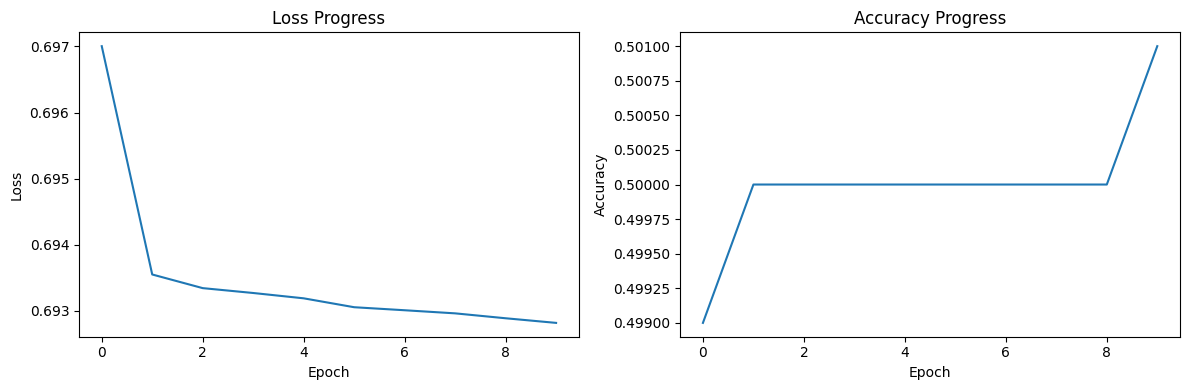

In [18]:
# Plot the loss and accuracy progress
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Progress')

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Progress')

plt.tight_layout()
plt.show()